In [2]:
import numpy as np
import matplotlib.pyplot as plt

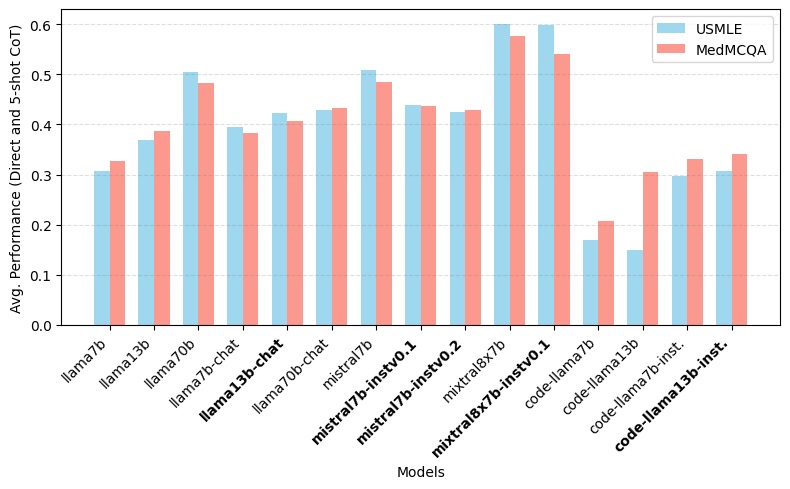

In [3]:
# Model names
models = ["llama7b", "llama13b", "llama70b", "llama7b-chat", "llama13b-chat", 
          "llama70b-chat", "mistral7b", "mistral7b-instv0.1", 
          "mistral7b-instv0.2", "mixtral8x7b", "mixtral8x7b-instv0.1", "code-llama7b", 
          "code-llama13b", "code-llama7b-inst.", "code-llama13b-inst."]



# Data for each model and configuration
data = {
    "llama7b": {"USMLE": [0.295, 0.323, 0.303], "MedMCQA": [0.25, 0.343, 0.385]},
    "llama13b": {"USMLE": [0.342, 0.375, 0.39], "MedMCQA": [0.328, 0.405, 0.429]},
    "llama70b": {"USMLE": [0.434, 0.574], "MedMCQA": [0.428, 0.536]},
    "llama7b-chat": {"USMLE": [0.386, 0.375, 0.422], "MedMCQA": [0.394, 0.372, 0.38]},
    "llama13b-chat": {"USMLE": [0.422, 0.411, 0.438], "MedMCQA": [0.375, 0.411, 0.432]},
    "llama70b-chat": {"USMLE": [0.423, 0.434], "MedMCQA": [0.418, 0.449]},
    "mistral7b": {"USMLE": [0.515, 0.513, 0.499], "MedMCQA": [0.449, 0.497, 0.508]},
    "mistral7b-instv0.1": {"USMLE": [0.422, 0.45, 0.447], "MedMCQA": [0.408, 0.457, 0.447]},
    "mistral7b-instv0.2": {"USMLE": [0.47, 0.307, 0.497], "MedMCQA": [0.443, 0.396, 0.447]},
    "mixtral8x7b": {"USMLE": [0.594, 0.604, 0.603], "MedMCQA": [0.546, 0.592, 0.589]},
    "mixtral8x7b-instv0.1": {"USMLE": [0.565, 0.582, 0.647], "MedMCQA": [0.503, 0.55, 0.571]},
    "code-llama7b": {"USMLE": [0.217, 0.24, 0.053], "MedMCQA": [0.219, 0.303, 0.1]},
    "code-llama13b": {"USMLE": [0.287, 0.01], "MedMCQA": [0.271, 0.34]},
    "code-llama7b-inst.": {"USMLE": [0.31, 0.293, 0.288], "MedMCQA": [0.35, 0.323, 0.318]},
    "code-llama13b-inst.": {"USMLE": [0.317, 0.307, 0.296], "MedMCQA": [0.335, 0.342, 0.343]}
}

# Colors for the bars
usmle_color = 'skyblue'  # Color for USMLE bars
medmcqa_color = 'salmon'  # Color for MedMCQA bars

# Calculating average performance for each model
average_performance = {}
for model, scores in data.items():
    usmle_avg = np.average(scores['USMLE'])
    medmcqa_avg = np.average(scores['MedMCQA'])
    average_performance[model] = {"USMLE": usmle_avg, "MedMCQA": medmcqa_avg}

# Extracting the averages for plotting
usmle_averages = [average_performance[model]['USMLE'] for model in models]
medmcqa_averages = [average_performance[model]['MedMCQA'] for model in models]

# Plotting the corrected bar chart
fig, ax = plt.subplots(figsize=(8, 5))



# Setting the positions and width for the bars
pos = np.arange(len(models))
bar_width = 0.35

plt.bar(pos, usmle_averages, bar_width, label='USMLE', alpha=0.8, color = usmle_color)
plt.bar(pos + bar_width, medmcqa_averages, bar_width, label='MedMCQA', alpha=0.8, color = medmcqa_color)

ax.set_xlabel('Models')
ax.set_ylabel('Avg. Performance (Direct and 5-shot CoT)')
#ax.set_title('Comparison of Max Model Performance on USMLE and MedMCQA')
#ax.set_xticks()
#ax.set_xticklabels(models, rotation=45, ha="right")


# add the model names as the x-axis labels where the selected models are bolded
ax.set_xticks(pos + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# bold the selected models
bold_models = ["llama13b-chat", "code-llama13b-inst.", "mistral7b-instv0.1", "mistral7b-instv0.2", "mixtral8x7b-instv0.1"]
# somehow highlight the selected models
for i in range(len(models)):
    if models[i] in bold_models:
        ax.get_xticklabels()[i].set_weight("bold")
        ax.get_xticklabels()[i].set_color("black")


plt.tight_layout()
plt.show()
